In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import timeit

import model
import train

In [2]:
# Check data distribution
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

train_dataset = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=60000, shuffle=True, num_workers=4)

test_set = torchvision.datasets.FashionMNIST(root='./data', download=False, train=False,transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=10000, shuffle=True, num_workers=4)

dataiter_train = iter(trainloader)
images_train, labels_train = dataiter_train.next()

dataiter_test = iter(testloader)
images_test, labels_test = dataiter_test.next()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


0it [00:00, ?it/s]

26427392it [00:07, 3561616.88it/s]                               


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:05, 6421.28it/s]             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:05, 806595.87it/s]                               
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:05, 1608.21it/s]             


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Text(0, 0.5, 'Number of images')

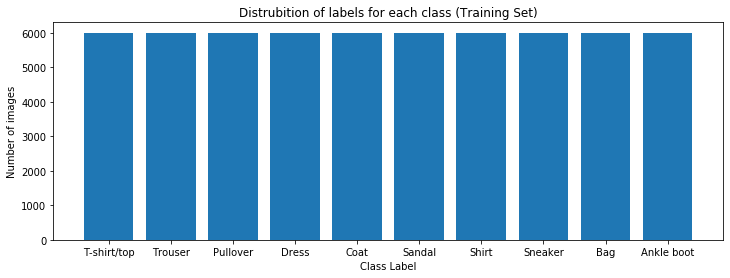

In [3]:
# Training set distribution
training_labels = []

number_of_classes = 10
  
for index in range(number_of_classes):
    
    number_of_labels  = len(np.where(labels_train.numpy()==index)[0])
    training_labels.append(number_of_labels)
    
plt.figure(figsize=(12,4))
plt.bar(range(0,10),training_labels)
x_ticks_labels = [x for x in class_names]
plt.xticks(range(0,10),x_ticks_labels)
plt.title('Distrubition of labels for each class (Training Set)')
plt.xlabel("Class Label")
plt.ylabel("Number of images")
#plt.savefig("train_dist.png")

Text(0, 0.5, 'Number of images')

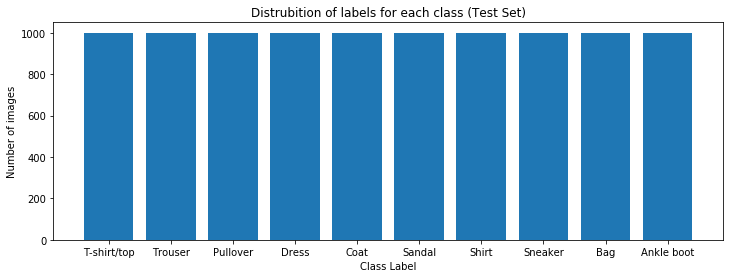

In [4]:
# Test set distribution
test_labels = []

for index in range(number_of_classes):
    
    number_of_labels  = len(np.where(labels_test.numpy()==index)[0])
    test_labels.append(number_of_labels)
    
plt.figure(figsize=(12,4))
plt.bar(range(0,10),test_labels)
x_ticks_labels = [x for x in class_names]
plt.xticks(range(0,10),x_ticks_labels)
plt.title('Distrubition of labels for each class (Test Set)')
plt.xlabel("Class Label")
plt.ylabel("Number of images")
#plt.savefig("train_dist.png")

In [8]:
#Test trained model
net = model.resnet14()
net.load_state_dict(torch.load('./model/fashin_mnist_resnet14_Le.pt'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2):

In [9]:
acc = train.test(net, device, testloader)
print(acc)


Test set: Average loss: 0.3198, Accuracy: 9361/10000 (94%)

93.61


In [10]:
net = model.resnet14()
net.load_state_dict(torch.load('./model/fashin_mnist_resnet14s_hf.pt'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

ResNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2):

In [11]:
acc = train.test(net, device, testloader)
print(acc)


Test set: Average loss: 0.3238, Accuracy: 9435/10000 (94%)

94.35


In [12]:
#Error analysis
start = timeit.default_timer()
testloader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True, num_workers=4)
mis_imgs = []
mis_labels = []
true_labels = []
net.eval()
preds = []
with torch.no_grad():
    for data, target in testloader:
        img = data
        label = target
        data, target = data.to(device), target.to(device)
        output = net(data)
        pred = output.argmax(dim=1, keepdim=True)
        #print(pred)
        if pred.to('cpu').numpy()[0][0] != label.numpy()[0]:
            mis_imgs.append(img[0])
            mis_labels.append(pred.to('cpu').numpy()[0][0])
            true_labels.append(label.numpy()[0])
            
print( (timeit.default_timer() - start)/10000 )

0.002131988055119291


Text(0, 0.5, 'Number of images that are misclassified')

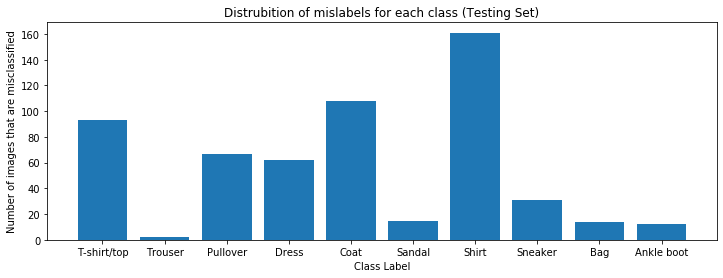

In [14]:
testing_mislabels =  []

for index in range(10):
  
     number_of_mislabels  = len(np.where(np.array(mis_labels)==index)[0])
     testing_mislabels.append(number_of_mislabels)
      

plt.figure(figsize=(12,4))
plt.bar(range(1,11),testing_mislabels)
plt.title('Distrubition of mislabels for each class (Testing Set)')
x_ticks_labels = [x for x in class_names]
plt.xticks(range(1,11),x_ticks_labels)
plt.xlabel("Class Label")
plt.ylabel("Number of images that are misclassified")
#plt.savefig("error_dist.png")

Text(0, 0.5, 'Number of images that are misclassified')

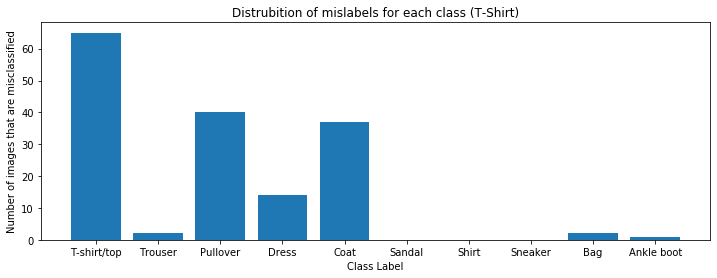

In [15]:
mis_shirt = np.where(np.array(mis_labels)==6)[0]
t_shirt = np.array(true_labels)[mis_shirt]
testing_mislabels =  []

for index in range(10):
  
     number_of_mislabels  = len(np.where(t_shirt==index)[0])
     testing_mislabels.append(number_of_mislabels)
      

plt.figure(figsize=(12,4))
plt.bar(range(1,11),testing_mislabels)
plt.title('Distrubition of mislabels for each class (T-Shirt)')
x_ticks_labels = [x for x in class_names]
plt.xticks(range(1,11),x_ticks_labels)
plt.xlabel("Class Label")
plt.ylabel("Number of images that are misclassified")
#plt.savefig("T-shirt_error.png")